### === Task ===

1. With the iris data given in class, implement train_test_split from scratch.

2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".

3. Calculate time taken to fit your models using different training methods.

4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.

5. Simply, use classification_report from sklearn.metrics to evaluate your models.

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [2]:
# Split data into training and test datasets
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [3]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

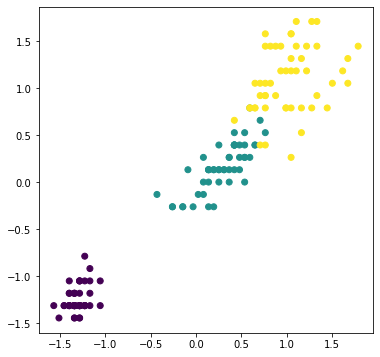

In [4]:
# Step 1.1 (optional): Visualize our data

# your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [5]:
# Step 2: Fit your data


class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            for i in range(self.max_iter):
                list_of_used_ix = []
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 1.3821321222636598
Loss at iteration 500 0.17318858915336408
Loss at iteration 1000 0.1295046711641689
Loss at iteration 1500 0.11240159042866435
Loss at iteration 2000 0.1031556898850829
Loss at iteration 2500 0.09733004916838588
Loss at iteration 3000 0.09331194224452573
Loss at iteration 3500 0.09036908767299655
Loss at iteration 4000 0.08811932553731054
Loss at iteration 4500 0.08634311355487065
Loss at iteration 5000 0.08490511249147033
Loss at iteration 5500 0.08371724938428927
Loss at iteration 6000 0.08271969460003618
Loss at iteration 6500 0.08187035830560195
Loss at iteration 7000 0.0811387572281872
Loss at iteration 7500 0.08050226475846876
Loss at iteration 8000 0.07994372822011103
Loss at iteration 8500 0.07944990445794575
Loss at iteration 9000 0.07901040332845152
Loss at iteration 9500 0.07861695646278129
time taken: 0.40612220764160156
=========Classification report=======
Report:                precision    recall  f1-score   support

           0  

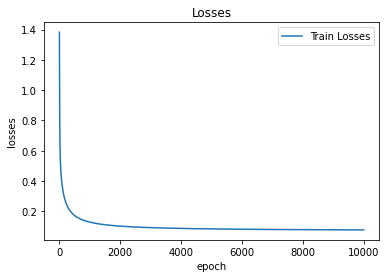

In [6]:
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.3883419605351364
Loss at iteration 500 0.3335066615559231
Loss at iteration 1000 0.2849348182303069
Loss at iteration 1500 0.21720594540200533
Loss at iteration 2000 0.19218946515507807
Loss at iteration 2500 0.1619261767160875
Loss at iteration 3000 0.07528230552442572
Loss at iteration 3500 0.1587445079990083
Loss at iteration 4000 0.148790419871473
Loss at iteration 4500 0.07371117710825371
Loss at iteration 5000 0.18256981253388826
Loss at iteration 5500 0.05367987555646089
Loss at iteration 6000 0.05385939303246064
Loss at iteration 6500 0.05747289725036087
Loss at iteration 7000 0.1304861810306332
Loss at iteration 7500 0.07132314996053803
Loss at iteration 8000 0.04124130593015748
Loss at iteration 8500 0.1587959442161288
Loss at iteration 9000 0.061608156149285206
Loss at iteration 9500 0.14422642738570873
time taken: 0.41231489181518555
=========Classification report=======
Report:                precision    recall  f1-score   support

           0      

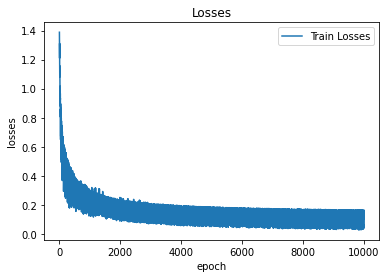

In [7]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.566540623157731
Loss at iteration 500 1.2821526367340426
Loss at iteration 1000 0.6336386388061732
Loss at iteration 1500 1.1105279533359913
Loss at iteration 2000 0.3637593408561244
Loss at iteration 2500 0.5541821581017938
Loss at iteration 3000 0.3264002629255294
Loss at iteration 3500 0.36896187851830764
Loss at iteration 4000 0.19311303584364622
Loss at iteration 4500 0.8586029020820709
Loss at iteration 5000 0.9949349149568828
Loss at iteration 5500 0.14415614768243337
Loss at iteration 6000 0.13727226878677848
Loss at iteration 6500 0.34131895746715385
Loss at iteration 7000 0.20525727532919763
Loss at iteration 7500 0.11006739070152333
Loss at iteration 8000 0.14534805984224086
Loss at iteration 8500 0.21780170124321407
Loss at iteration 9000 0.7521888192330913
Loss at iteration 9500 0.3367539836352303
time taken: 0.42243289947509766
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.0

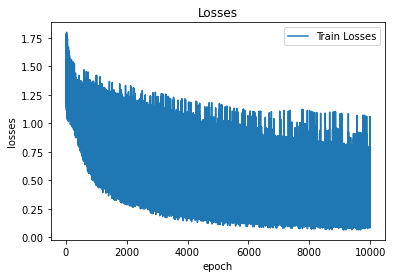

In [8]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [9]:
model = LogisticRegression(k, X_train.shape[1], "Chaky is so handsome")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".